In [1]:
import pandas as pd

In [2]:
with open("regression_x_t.txt") as file:
    lines = file.readlines()

lines = map(str.strip, lines)
lines = map(str.split, lines)
lines = [(float(x), float(y)) for x, y in lines]
lines

[(0.005, 0.3843),
 (0.01, 0.5689),
 (0.015, 0.8537),
 (0.02, 0.7009),
 (0.025, 0.9686),
 (0.03, 1.1089),
 (0.035, 1.1007),
 (0.04, 1.2912),
 (0.045, 1.308),
 (0.05, 1.2881),
 (0.055, 1.4605),
 (0.06, 1.476),
 (0.065, 1.5168),
 (0.07, 1.5382),
 (0.075, 1.6639),
 (0.08, 1.5186),
 (0.085, 1.7062),
 (0.09, 1.7317),
 (0.095, 1.7324),
 (0.1, 1.924),
 (0.105, 1.818),
 (0.11, 1.976),
 (0.115, 2.0477),
 (0.12, 1.9604),
 (0.125, 2.0278),
 (0.13, 2.0857),
 (0.135, 2.0334),
 (0.14, 2.1134),
 (0.145, 1.9488),
 (0.15, 2.1999),
 (0.155, 2.0018),
 (0.16, 1.9279),
 (0.165, 2.2575),
 (0.17, 2.1191),
 (0.175, 2.1748),
 (0.18, 2.0964),
 (0.185, 2.0317),
 (0.19, 1.8258),
 (0.195, 2.1933),
 (0.2, 2.098),
 (0.205, 2.1012),
 (0.21, 2.1542),
 (0.215, 1.9628),
 (0.22, 2.0213),
 (0.225, 2.197),
 (0.23, 2.1285),
 (0.235, 1.9256),
 (0.24, 1.8169),
 (0.245, 1.9622),
 (0.25, 2.0214),
 (0.255, 2.0736),
 (0.26, 1.9667),
 (0.265, 1.8217),
 (0.27, 1.9399),
 (0.275, 1.7662),
 (0.28, 1.7603),
 (0.285, 1.7627),
 (0.29, 1.6

In [3]:
X, Y = zip(*lines)

In [4]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = [np.array(data).reshape(-1, 1) for data in train_test_split(X, Y, test_size=0.2)]

In [5]:
X_train.reshape(-1)

array([9.415, 2.26 , 3.21 , ..., 1.515, 3.46 , 8.365])

### Linear Regression

In [6]:
from matplotlib import pyplot as plt
from sklearn import datasets, linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

/Users/audretjm/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


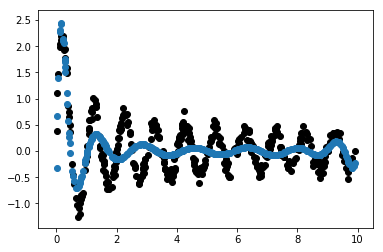

In [7]:
z = np.polyfit(X_train.reshape(-1), y_train.reshape(-1), 20)
p = np.poly1d(z)

plt.scatter(X_test, y_test, color='black')

y_pred = p(X_test)
plt.scatter(X_test, y_pred)


### Gradient Descent


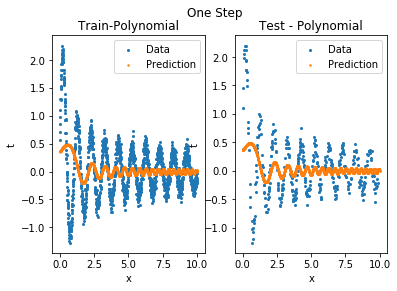

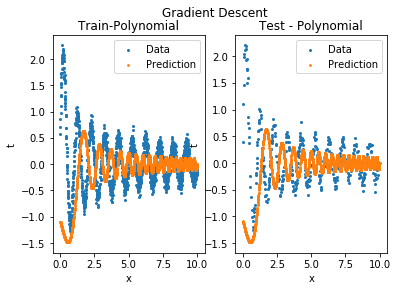

In [297]:
def sse(phiX, Y, W):
    R = fit(phiX, W) - Y
    return fit(np.transpose(R), R)[0][0]

def gd(phiX, Y, W, step_size=.01, epochs=100):
    num_samples = phiX.shape[0]
    costs = [0] * epochs
    
    for epoch in range(epochs):
        R = fit(phiX, W) - Y
        W = W - (step_size/num_samples) * (fit(phiX.T, R))
        costs[epoch] = sse(phiX, Y, W)
        
    return W, costs


def apply_basis(func, X):
    phiX = np.asarray(list(map(func, X)))
    phiX.resize((len(phiX), 1))
    
#     for func in funcs[1:]:
#         phi = np.array(list(map(func, X)))
#         phi.resize((len(phi), 1))
#         phiX = np.hstack((phiX, phi))
    
    return phiX

def fit(X, weights):
    return np.dot(X, weights)

def solution(X, Y, X_test, Y_test, func, model_name, step_size=.01, epochs=100):
    WO = np.random.randn(1, 1)
    
    phiX = apply_basis(func, X)
    phiX_test = apply_basis(func, X_test)
    
    W_gd, costs = gd(phiX, Y, WO, step_size, epochs)
    sse_test_gd = sse(phiX_test, Y_test, W_gd)
    
    L = np.linalg.inv(fit(phiX.T, phiX))
    R = fit(phiX.T, Y)
    W_opt = fit(L, R)
    sse_test_opt = sse(phiX_test, Y_test, W_opt)
    
    # One step
    plt.subplot(1, 2, 1)
    plt.scatter(X, Y, s=4)
    plt.scatter(X, fit(phiX, W_opt), s=2)
    plt.title(f"Train-{model_name}")
    plt.xlabel("x")
    plt.ylabel('t')
    plt.legend(("Data", "Prediction"))

    plt.subplot(1, 2, 2)
    plt.scatter(X_test, Y_test, s=4)
    plt.scatter(X, fit(phiX, W_opt), s=2)
    plt.title(f"Test - {model_name}")
    plt.xlabel("x")
    plt.ylabel("t")
    plt.legend(("Data", "Prediction"))
    plt.suptitle("One Step")
    plt.show()
    
    plt.subplot(1, 2, 1)
    plt.scatter(X, Y, s=4)
    plt.scatter(X, fit(phiX, W_gd), s=3)
    plt.title(f"Train-{model_name}")
    plt.xlabel("x")
    plt.ylabel('t')
    plt.legend(("Data", "Prediction"))
    
    plt.subplot(1, 2, 2)
    plt.scatter(X_test, Y_test, s=4)
    plt.scatter(X, fit(phiX, W_gd), s=3)
    plt.title(f"Test - {model_name}")
    plt.xlabel("x")
    plt.ylabel("t")
    plt.legend(("Data", "Prediction"))
    plt.suptitle("Gradient Descent")
    plt.show()
    
import math
func = lambda X: math.sin(X*X + X) * 1/X
        

solution(X_train, y_train, X_test, y_test, func, "Polynomial", step_size=.00001, epochs=10000)
